In [3]:
import numpy as np
import matplotlib.pyplot as plt



In [4]:
original_img = plt.imread('Data/rocks.jpg')

(-0.5, 735.5, 980.5, -0.5)

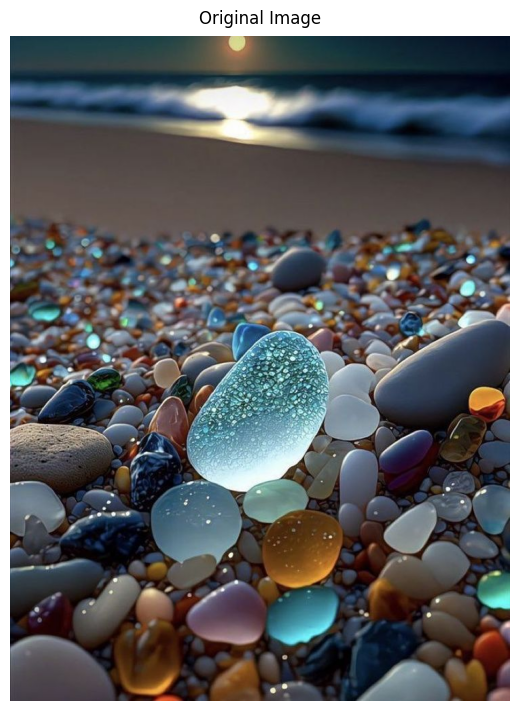

In [5]:
fig, ax = plt.subplots(constrained_layout = True)
fig.suptitle('Original Image')
fig.set_size_inches(6,7)

ax.imshow(original_img)
ax.axis(False)

In [6]:
# Showing 9 total pixels starting at the top left corner
print(f'The sample layout of the original image is as follows: \n{original_img[:3,:3,:]}')
print(f'The shape of the original image is: {original_img.shape}')

The sample layout of the original image is as follows: 
[[[20 52 67]
  [22 54 69]
  [24 56 71]]

 [[20 52 67]
  [22 54 69]
  [24 56 71]]

 [[21 53 68]
  [22 54 69]
  [24 56 71]]]
The shape of the original image is: (981, 736, 3)


In [7]:
# Analyze the original image size
print(f'The size of each pixel in the original image is: {original_img.itemsize *3} bytes or {original_img.itemsize * 8 * 3} bits')
print(f'The total size of the image is : {original_img.size} bytes or {original_img.size * 8} bits')

The size of each pixel in the original image is: 3 bytes or 24 bits
The total size of the image is : 2166048 bytes or 17328384 bits


In [8]:
# Reshape the image into a m x 3 array where m = 981 * 736 = 722016 examples
# Normalize RGB values from range 0-255 to 0-1 to avoid bias

X = original_img.reshape(-1,3) / 255
print(f'New shape of original image : {X.shape}',end = '\n')
print(f'First 5 pixel RGB values: \n{X[:5]}')

New shape of original image : (722016, 3)
First 5 pixel RGB values: 
[[0.07843137 0.20392157 0.2627451 ]
 [0.08627451 0.21176471 0.27058824]
 [0.09411765 0.21960784 0.27843137]
 [0.09411765 0.21960784 0.27843137]
 [0.09019608 0.21568627 0.2745098 ]]


In [17]:
class k_means():
    def __init__(self, X, clusters,max_iters = 15):
        self.X = X
        self.k = clusters
        self.centroids = np.zeros((clusters, X.shape[1]))
        self.idx = np.zeros(self.X.shape[0], dtype = int)

        self.train_model(max_iters)

        


    def init_centroids(self):
        random_locations = np.random.choice(len(self.X),self.k,replace = False)
        initial_centroids = self.X[random_locations,:]
        self.centroids = initial_centroids
        return initial_centroids

    def calculate_clusters(self):
        
        num_examples = self.X.shape[0]
        
        for i in range(num_examples):
            closest_centroid = int(np.argmin(np.sum((self.X[i,:] - self.centroids) ** 2,axis = 1)))
            self.idx[i] = closest_centroid
        
        return self.idx

    def move_centroids(self):
        for k in range(self.k):
           self.centroids[k,:] =  np.mean(self.X[self.idx == k],axis =0)
        return self.centroids

    def compute_loss(self):
        # loss = 0
        # for i in range(self.X.shape[0]):
            
        #     loss += np.sum((self.X[i,:] - self.centroids[self.idx[i],:]) ** 2)
        # return loss / len(self.X.shape[0])
        loss = np.sum((self.X - self.centroids[self.idx]) ** 2, axis = 1)
        return np.mean(loss)
        


    def train_model(self,max_iters):
        self.init_centroids()
        
        loss_hist =[]
        for i in range(max_iters):
            self.calculate_clusters()
            loss_hist.append(self.compute_loss())
            self.move_centroids()
            print(f'Finished iteration {i+1}')
        
        self.loss_hist = loss_hist

    def get_result(self):
        return self.centroids, self.loss_hist
            
            
            
            
                
            

In [18]:
k = k_means(X,3,5)

Finished iteration 1
Finished iteration 2
Finished iteration 3
Finished iteration 4
Finished iteration 5


In [19]:
centroids, losses = k.get_result()


In [20]:
print(centroids)
print(losses)

[[0.13747279 0.12290606 0.13456198]
 [0.31531443 0.31536417 0.32702856]
 [0.57185451 0.64242566 0.6545549 ]]
[59388.940684357054, 27758.313773389564, 24229.877171392425, 23229.04302516061, 22783.56452753348]


In [21]:
num_learners = 10
colors = 5
models = []
for i in range(num_learners):
    model = k_means(X,colors,10)
    models.append(model)
    print(f'Finished Training Model {i+1} ')


Finished iteration 1
Finished iteration 2
Finished iteration 3
Finished iteration 4
Finished iteration 5
Finished iteration 6
Finished iteration 7
Finished iteration 8
Finished iteration 9
Finished iteration 10
Finished Training Model 1 
Finished iteration 1
Finished iteration 2
Finished iteration 3
Finished iteration 4
Finished iteration 5
Finished iteration 6
Finished iteration 7
Finished iteration 8
Finished iteration 9
Finished iteration 10
Finished Training Model 2 
Finished iteration 1
Finished iteration 2
Finished iteration 3
Finished iteration 4
Finished iteration 5
Finished iteration 6
Finished iteration 7
Finished iteration 8
Finished iteration 9
Finished iteration 10
Finished Training Model 3 
Finished iteration 1
Finished iteration 2
Finished iteration 3
Finished iteration 4
Finished iteration 5
Finished iteration 6
Finished iteration 7
Finished iteration 8
Finished iteration 9
Finished iteration 10
Finished Training Model 4 
Finished iteration 1
Finished iteration 2
Finish

In [22]:
best_loss = float('inf')
best_colors = None
for model in models:
    centroids, losses = model.get_result()
    if losses[len(losses) -1 ] < best_loss:
        best_loss = losses[len(losses) -1 ]
        best_colors = centroids


    
    

In [23]:
best_loss

13462.560956523292

In [24]:
best_colors 

array([[0.49191497, 0.55759791, 0.5795497 ],
       [0.11304296, 0.09623648, 0.11173415],
       [0.25814198, 0.24690276, 0.24996047],
       [0.35259137, 0.36169669, 0.37948276],
       [0.76807062, 0.85466421, 0.84665594]])